In [1]:
import pandas as pd
import tweepy 


In [2]:
# Using the consumer keys and access key to extract the tweets from twitter
consumer_key = "J2SG0K7CP8PlnqxfCC6X4qqYt"
consumer_secret = "BX0vPEOySfEY4kLaOBUHBHxLKj1njiUbhWzZMQTWj0OBifnbka"
access_key = "1146289980064632839-9NqGJVUSmFIv1neU3k6m5KcDTcmyKo"
access_secret = "GyoxlWMzXRquiKDwxbqaMRuIsD3oOn6F1B5zzVOS7izOp"

In [17]:
alltweets = []	

def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    
    import pandas as pd
    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

SunitaWilliams_tweets = get_all_tweets("Astro_Suni")

...320 tweets downloaded so far
...320 tweets downloaded so far


In [18]:
# Checking the extracted tweets
SunitaWilliams_tweets


,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,2020-10-27 23:42:29,[],[],2003,None,1321235852668866560,en,None,126,False,Twitter for iPhone,Go crew 1! Excited for 14 November!!! https:/...,"Houston, TX",Sunita Williams,None,None
1,2020-10-03 01:35:38,"[{'text': 'Cygnus', 'indices': [51, 58]}]","[{'screen_name': 'Space_Station', 'name': 'Int...",0,None,1312204631758397440,en,None,688,False,Twitter for iPhone,RT @Space_Station: Liftoff of the @NorthropGru...,"Houston, TX",Sunita Williams,None,None
2,2020-10-03 01:33:51,[],[],3895,None,1312204182183571456,en,None,392,False,Twitter for iPhone,Congratulations SS Kalpana Chawla! On her way...,"Houston, TX",Sunita Williams,None,None
3,2020-10-03 01:31:09,[],"[{'screen_name': 'NASA', 'name': 'NASA', 'id':...",0,None,1312203502232367106,en,None,1891,False,Twitter for iPhone,RT @NASA: 3.. 2.. 1.. liftoff. 🚀\n\n@NorthropG...,"Houston, TX",Sunita Williams,None,None
4,2020-08-25 19:02:40,[],"[{'screen_name': 'JimBridenstine', 'name': 'Ji...",0,None,1298334998651641857,en,None,526,False,Twitter for iPhone,RT @JimBridenstine: NEWS: We assigned @Astro_J...,"Houston, TX",Sunita Williams,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2012-05-29 06:38:53,[],[],6,None,207360343662530560,en,None,1,False,Twitter for iPhone,"In preparation for launch, oOur first exam is ...","Houston, TX",Sunita Williams,None,None
316,2012-05-24 19:10:40,[],"[{'screen_name': 'douglaslee99', 'name': 'Doug...",2,None,205737597283221504,en,None,0,False,Twitter for iPhone,@douglaslee99\nAbsolutely correct! Not a mass...,"Houston, TX",Sunita Williams,None,None
317,2012-05-24 19:09:44,[],"[{'screen_name': 'douglaslee99', 'name': 'Doug...",0,None,205737364948135936,en,None,1,False,Twitter for iPhone,RT @douglaslee99: @Astro_Suni Restraint system...,"Houston, TX",Sunita Williams,None,None
318,2012-05-23 06:54:03,[],[],20,None,205189831175843841,en,None,15,False,Twitter for iPhone,Last day of training in Cologne. \n\nLots of e...,"Houston, TX",Sunita Williams,None,None


In [19]:
# Extracting only the 'text' section of the tweet
SunitaWilliams_tweets["text"]

0      Go crew 1!  Excited for 14 November!!! https:/...
1      RT @Space_Station: Liftoff of the @NorthropGru...
2      Congratulations SS Kalpana Chawla!  On her way...
3      RT @NASA: 3.. 2.. 1.. liftoff. 🚀\n\n@NorthropG...
4      RT @JimBridenstine: NEWS: We assigned @Astro_J...
                             ...                        
315    In preparation for launch, oOur first exam is ...
316    @douglaslee99\nAbsolutely correct!  Not a mass...
317    RT @douglaslee99: @Astro_Suni Restraint system...
318    Last day of training in Cologne. \n\nLots of e...
319    My very first tweet and my last from the US.\n...
Name: text, Length: 320, dtype: object

In [20]:
# Combining all the tweets into a single paragraph
tweet_df = " ".join(SunitaWilliams_tweets["text"])
tweet_df


'Go crew 1!  Excited for 14 November!!! https://t.co/8OVZb6X45A RT @Space_Station: Liftoff of the @NorthropGrumman #Cygnus space freighter SS Kalpana Chawla carrying nearly 8,000 pounds of science and su… Congratulations SS Kalpana Chawla!  On her way to the International Space Station! RT @NASA: 3.. 2.. 1.. liftoff. 🚀\n\n@NorthropGrumman\'s Antares rocket &amp; Cygnus spacecraft launch from @NASA_Wallops. This Cygnus, named the S… RT @JimBridenstine: NEWS: We assigned @Astro_Jeanette to NASA’s Boeing Starliner-1 mission, the first operational @BoeingSpace mission with… RT @astro_josh: Congratulations, @Astro_Jeanette! Welcome to the team joining @Astro_Suni and me on #Starliner to #LaunchAmerica https://t.… RT @Astro_Ferg: .@Astro_Jeanette, the #Starliner Crew Flight Test team is excited to welcome you to the Starliner-1 Crew with @astro_josh a… RT @Astro_Jeanette: Thank you @JimBridenstine! I’m looking forward to the mission.🚀💫 https://t.co/cSRf1SE4cr Welcome to our CTS Starliner 1 c

In [21]:
#Text processing
import re
# Removing all the http links from the tweets
tweet_df = re.sub(r"http\S+", "", tweet_df)
tweet_df


'Go crew 1!  Excited for 14 November!!!  RT @Space_Station: Liftoff of the @NorthropGrumman #Cygnus space freighter SS Kalpana Chawla carrying nearly 8,000 pounds of science and su… Congratulations SS Kalpana Chawla!  On her way to the International Space Station! RT @NASA: 3.. 2.. 1.. liftoff. 🚀\n\n@NorthropGrumman\'s Antares rocket &amp; Cygnus spacecraft launch from @NASA_Wallops. This Cygnus, named the S… RT @JimBridenstine: NEWS: We assigned @Astro_Jeanette to NASA’s Boeing Starliner-1 mission, the first operational @BoeingSpace mission with… RT @astro_josh: Congratulations, @Astro_Jeanette! Welcome to the team joining @Astro_Suni and me on #Starliner to #LaunchAmerica  RT @Astro_Ferg: .@Astro_Jeanette, the #Starliner Crew Flight Test team is excited to welcome you to the Starliner-1 Crew with @astro_josh a… RT @Astro_Jeanette: Thank you @JimBridenstine! I’m looking forward to the mission.🚀💫  Welcome to our CTS Starliner 1 crew Dr Jeanette Epps!!!!  Congrao!  Super cool mission!  

In [22]:
# Removing all the puntuations, numbers and lowering the case of  letters
tweets = re.sub("[^A-Za-z" "]+"," ",tweet_df).lower()
tweets = re.sub("[0-9" "]+"," ",tweets)
tweets

'go crew excited for november rt space station liftoff of the northropgrumman cygnus space freighter ss kalpana chawla carrying nearly pounds of science and su congratulations ss kalpana chawla on her way to the international space station rt nasa liftoff northropgrumman s antares rocket amp cygnus spacecraft launch from nasa wallops this cygnus named the s rt jimbridenstine news we assigned astro jeanette to nasa s boeing starliner mission the first operational boeingspace mission with rt astro josh congratulations astro jeanette welcome to the team joining astro suni and me on starliner to launchamerica rt astro ferg astro jeanette the starliner crew flight test team is excited to welcome you to the starliner crew with astro josh a rt astro jeanette thank you jimbridenstine i m looking forward to the mission welcome to our cts starliner crew dr jeanette epps congrao super cool mission this morning gunner and rotor tested the waters in the gulf of mexico looking forward to the spacex 

In [23]:
# Splitting the paragraph into words
tweet_words = tweets.split(" ")
tweet_words
len(tweet_words)


5106

In [24]:
from google.colab import files
uploaded = files.upload()


Saving stop.txt to stop (1).txt


In [25]:
import io
stop = pd.read_csv(io.StringIO(uploaded['stop.txt'].decode('utf-8')))

In [26]:
stop.head()

,a
0,a's
1,able
2,about
3,above
4,according


In [27]:
# Removing all the stop words from the tweets
tweets_final = [w for w in tweet_words if not w in stop]
tweets_final
len(tweets_final)


5034

In [28]:
# Joining all the tweet words into one paragraph
tweets_final_string = " ".join(tweets_final)
tweets_final_string


'go crew excited for november rt space station liftoff of the northropgrumman cygnus space freighter ss kalpana chawla carrying nearly pounds of science and su congratulations ss kalpana chawla on her way to the international space station rt nasa liftoff northropgrumman s antares rocket amp cygnus spacecraft launch from nasa wallops this cygnus named the s rt jimbridenstine news we assigned astro jeanette to nasa s boeing starliner mission the first operational boeingspace mission with rt astro josh congratulations astro jeanette welcome to the team joining astro suni and me on starliner to launchamerica rt astro ferg astro jeanette the starliner crew flight test team is excited to welcome you to the starliner crew with astro josh rt astro jeanette thank you jimbridenstine i m looking forward to the mission welcome to our cts starliner crew dr jeanette epps congrao super cool mission this morning gunner and rotor tested the waters in the gulf of mexico looking forward to the spacex dr

In [29]:
#Sentimental analysis
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


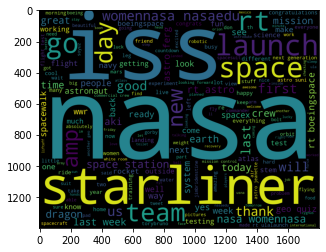

In [30]:
# Plotting a wordcloud with all the unique words in the tweets
wordcloud_tweet = WordCloud(
                    background_color="black",
                    width=1800,
                    height=1400,
                    ).generate(tweets_final_string)
plt.imshow(wordcloud_tweet)


In [31]:
# List of all the unique words in the reviews
tweet_unique = list(set("".join(tweets_final_string).split(" ")))
tweet_unique
len(tweet_unique)


1585

In [32]:
from google.colab import files
uploaded = files.upload()


Saving positive-words.txt to positive-words.txt


In [33]:
with open(r'positive-words.txt', 'r') as f:

    poswords=f.read()

vocab = sorted(set(poswords))

vocab_to_int = {c: i for i, c in enumerate(vocab)}

int_to_vocab = dict(enumerate(vocab))

encoded = np.array([vocab_to_int[c] for c in poswords], dtype=np.int32)

In [34]:
poswords.split
poswords = poswords[36:]


In [35]:
from google.colab import files
uploaded = files.upload()


Saving negative-words.txt to negative-words.txt


In [36]:
with open(r'negative-words.txt', 'r',encoding="ISO-8859-1") as f:

    negwords=f.read()

vocab = sorted(set(negwords))

vocab_to_int = {c: i for i, c in enumerate(vocab)}

int_to_vocab = dict(enumerate(vocab))

encoded = np.array([vocab_to_int[c] for c in negwords], dtype=np.int32)

In [37]:
negwords.split
negwords = negwords[37:]


In [38]:
# Joining all the negative words into a paragraph
tweet_neg = " ".join([w for w in tweets_final if w in negwords])
tweet_neg
len(tweet_neg)


12155

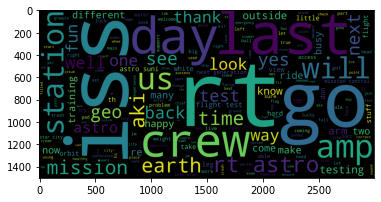

In [45]:
# Builiding wordcloud of negative words
wordcloud_neg = WordCloud(
                    background_color="black",
                    width=3000,
                    height=1500,
                    ).generate(tweet_neg)
plt.imshow(wordcloud_neg)


In [42]:
# Joining all the positive words into a paragraph
tweet_pos= " ".join([w for w in tweets_final if w in poswords])
tweet_pos
len(tweet_pos)


11056

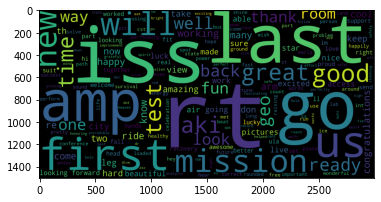

In [44]:
# Builiding wordcloud of positive words
wordcloud_pos = WordCloud(
                background_color="black",
                width=3000,
                height=1500,
                ).generate(tweet_pos)
plt.imshow(wordcloud_pos)


### count of negative words = 12155 which is greater than positive word count thus it is Negative Sentiment


###  